In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
prosper_df = pd.read_csv('Update_Listings_cleaned_v1.csv', index_col='unique_identifier')

prosper_df.head()

,listing_amount,amount_funded,lender_yield,borrower_apr,listing_term,listing_monthly_payment,income_range,income_range_description,stated_monthly_income,employment_status,...,lender_indicator,group_indicator,Fico_rating,TUFicoRange,dti_wprosper_loan,CoBorrowerApplication,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome,rating_num,prosper_rating
unique_identifier,,,,,,,,,,,,,,,,,,,,,
0,17300,17300,0.1349,0.1683,60,406.95,6,"$100,000+",11250.0000,0,...,0,False,6,760-779,0.2377,True,0.2377,16250.0000,1,B
1,25000,25000,0.0999,0.1325,60,543.44,6,"$100,000+",15416.6667,0,...,0,False,6,760-779,0.2900,True,0.2900,22333.3333,0,A
2,3500,3500,0.1179,0.1641,36,117.58,4,"$50,000-74,999",4166.6667,0,...,0,False,3,700-719,0.0309,True,0.0309,7500.0000,1,B
3,5000,5000,0.0964,0.1422,36,162.84,4,"$50,000-74,999",5000.0000,0,...,0,False,1,660-679,0.1818,True,0.1818,8333.3333,0,A
4,21795,21795,0.0530,0.0795,36,666.01,6,"$100,000+",20000.0000,0,...,0,False,9,820-850,0.1816,True,0.1816,23833.3333,0,AA


In [4]:
y = prosper_df["rating_num"]
X = prosper_df.drop([
    "listing_amount", "lender_yield", "borrower_apr", "listing_monthly_payment",
    "income_range_description","employment_status_description", "occupation", 
    "borrower_state_num", "borrower_state", "borrower_city", "group_indicator", 
    "TUFicoRange", "CoBorrowerApplication", "rating_num", "prosper_rating"    
], axis=1)

In [5]:
X.head()

,amount_funded,listing_term,income_range,stated_monthly_income,employment_status,months_employed,prior_prosper_loans,prior_prosper_loans_principal_borrowed,prior_prosper_loans_principal_outstanding,prior_prosper_loans_balance_outstanding,prior_prosper_loans_cycles_billed,prior_prosper_loans_ontime_payments,prior_prosper_loans_late_cycles,prior_prosper_loan_earliest_pay_off,lender_indicator,Fico_rating,dti_wprosper_loan,CombinedDtiwProsperLoan,CombinedStatedMonthlyIncome
unique_identifier,,,,,,,,,,,,,,,,,,,
0,17300,60,6,11250.0000,0,300,2,25000.0,8809.62,0,1,1,0,7,0,6,0.2377,0.2377,16250.0000
1,25000,60,6,15416.6667,0,32,2,17000.0,0.00,0,0,0,0,1,0,6,0.2900,0.2900,22333.3333
2,3500,36,4,4166.6667,0,11,3,15000.0,0.00,0,15,15,0,0,0,3,0.0309,0.0309,7500.0000
3,5000,36,4,5000.0000,0,6,1,3000.0,0.00,0,0,0,0,24,0,1,0.1818,0.1818,8333.3333
4,21795,36,6,20000.0000,0,57,1,19000.0,0.00,0,0,0,0,30,0,9,0.1816,0.1816,23833.3333


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=78, stratify=y)

In [8]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [35]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(round(accuracy,2))

0.75


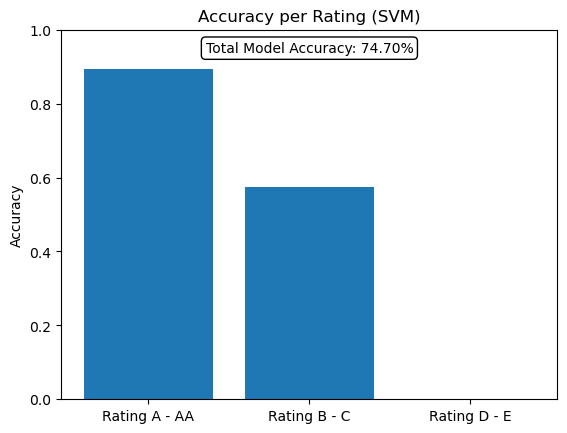

In [39]:
accuracies_per_rating = []
for rating in sorted(y_test.unique()):
    accuracy_per_rating = accuracy_score(y_test[y_test == rating], y_pred[y_test == rating])
    accuracies_per_rating.append(accuracy_per_rating)

labels = ['Rating A - AA', 'Rating B - C', 'Rating D - E']

ratings = sorted(y_test.unique())
fig, ax = plt.subplots()
ax.bar(ratings, accuracies_per_rating)
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy per Rating (SVM)')
ax.set_xticks(ratings)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1)

bbox_props = dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1)
ax.text(0.5, 0.95, f'Total Model Accuracy: {accuracy:.2%}', transform=ax.transAxes, ha="center", va="center", bbox=bbox_props)
plt.savefig('Visualizations\support_vector.png')
plt.show()